<a href="https://colab.research.google.com/github/danielsabino/ppgti3007_cv_2021_2/blob/main/semana02/aula04/%5Bnotebook%5Dcv_w02_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descritores de Imagens

Como já foi visto antes, na grande maioria das situações, não utilizamos a imagem em si para realizar alguma inferência sobre seu significado. Para isso, extraímos algumas de suas características, ou seja, quantificamos de forma abstrata o conteúdo de uma imagem em um conjunto de números (as *features*). O algoritmo que realiza esse processo é chamado de descritor de imagens ou descritor de características.

Por outro lado, o processo de utilizar um descritor de imagem para obter um vetor de características é chamado de extração de características (*feature extraction*).

Note que a extração de características pode ser utilizada com o objetivo de fazer virtualmente qualquer aplicação em visão computacional: comparação de imagens, classificação e agrupamento de imagens, detecção de objetos, entre muitas outras. O vetor de características extraído representa um conjunto de propriedades da imagens, tais como textura, cor, formato ou, até mesmo, uma combinação deles.

Dependendo da literatura utilizada para estudar sobre esse tema, pode ainda existir o que é chamado de descritor de características (*feature descriptor*). Sua principal diferença para a descritor de imagem é que ele analisa partes específicas de uma imagem de entrada e gera como saída vários vetores de características, um para cada região analisada. No fim, então, temos os seguintes conceitos:

1. descritor de imagem: são características extraídas a partir de uma imagem completa;
2. descritor de características: são características extraídas de regiões específicas da imagem;
3. vetor de características: vetor numérico que representa um descritor de imagem ou de característica.

Para fins deste notebook, o termo descritor vai ser utilizado de uma maneira geral a obtenção de características de uma imagem ou de parte dela.

Vamos, então, verificar alguns desses descritores.

## Halarick Textures

Como o próprio nome sugere, esse descritor busca quantificar e representar a aparência ou a consistência de uma superfície. Dada essa informação, esse tipo de descritor pode ser utilizado para identificar padrões de diferentes materiais, como: texturas em tecidos, suavidade de uma superfície, granularidade de material de construção, entre outros.

As features Halarick são computadas a partir da Gray-Level Co-occurrence Matrix (GLCM), uma matriz que caracteriza a textura a partir da verificação da frequência com que pares de pixels adjacentes com valores específicos ocorrem na imagem.

Para entender bem esse conceito, tenha como base uma pequena imagem em escala de cinza representada a seguir:
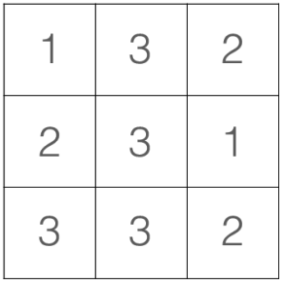

Essa imagem possui valores de intensidade de pixels variando entre 1 e 3. Para calcular as entradas da GLCM vamos considerar, primeiro, a co-ocorrência de pixels vizinhos no eixo x da imagem:

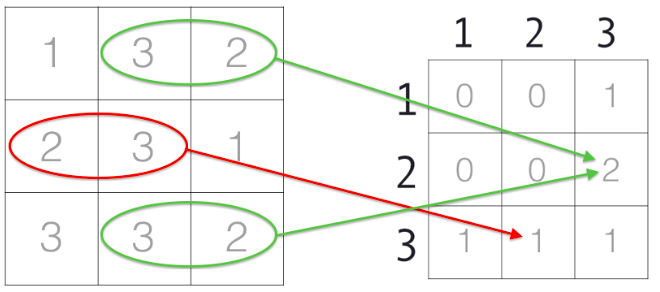

Na matriz a direita, estão os resultados da co-orrência dos pixels da imagem representada pela matriz a esquerda. Para ler essa matriz GLCM, considere a ordem coluna-linha: por exemplo, os valores 3 e 2 de pixels ocorrem nessa sequência duas vezes na imagem enquanto que a sequêcia de pixels com valores 2 e 3 só ocorre uma única vez.

Esse processo é feito, então, para todas as direções possíveis: esquerda-direita, cima-baixo, diagonal primária, diagonal secundária. Ao final, temos quatro matrizes GLCM. Essas matrizes são estatísticas de co-ocorrência de valores de pixels na imagem.

As features Halarick são extraídas a partir dessas matrizes. No seu [paper original](https://ieeexplore.ieee.org/document/4309314), Halarick propõe 14 features que podem ser extraídas da matriz GLCM. Na prática, no entanto, somente 13 são utilizadas com frequência. Dentre as caractirísticas extraídas da matriz, podemos citar algumas: segundo momento angular, contraste, correlação, variância, entropia, somas das médias.

Depois de calcular as features para todas as matrizes GLCM, o valor médio entre elas para ser o vetor de características final da imagem. O fato de utilizar a média, é uma forma de amenizar os efeitos da rotação nas imagens. Ou seja, ao invés de usar somente a matriz de uma das direções, utiliza-se de todas elas.

Vamos passar para um exemplo de utilização desse descritor. Para isso, vamos utilizar a [Describable Textures Dataset (DTD)](https://www.robots.ox.ac.uk/~vgg/data/dtd/), que é uma coleção de imagens de textura anotada disponível para a comunidade acadêmica. 

In [1]:
!wget 'https://www.robots.ox.ac.uk/~vgg/data/dtd/download/dtd-r1.0.1.tar.gz' -O 'textures.tar.gz'

--2022-02-15 18:01:35--  https://www.robots.ox.ac.uk/~vgg/data/dtd/download/dtd-r1.0.1.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625239812 (596M) [application/x-gzip]
Saving to: ‘textures.tar.gz’

textures.tar.gz     100%[===================>] 596.27M  29.0MB/s    in 22s     

2022-02-15 18:01:58 (26.6 MB/s) - ‘textures.tar.gz’ saved [625239812/625239812]



In [2]:
!tar -xzf 'textures.tar.gz'

Vamos medir a distância entre features de imagens com texturas diferentes para verificar a capacidade de descrição do descritor.

Vamos utilizar duas classes distintas para verificar isso. Dois exemplares das imagens estão listados abaixo.

In [3]:
import cv2
import glob
from scipy.spatial import distance
from google.colab.patches import cv2_imshow
from random import randint
import os
import numpy as np
import pandas as pd

In [4]:
!pip install mahotas
!pip install -U numpy

     |████████████████████████████████| 5.7 MB 5.3 MB/s 


In [5]:
import mahotas.features
import numpy as np

In [6]:
desc = pd.read_csv('/content/dtd/labels/labels_joint_anno.txt', names=['path', 'class', '2nd class'], sep=' ')

In [7]:
train_path = []
with open('/content/dtd/labels/train1.txt') as file:
  for line in file:
    train_path.append(line.strip())

with open('/content/dtd/labels/train2.txt') as file:
  for line in file:
    train_path.append(line.strip())

with open('/content/dtd/labels/train3.txt') as file:
  for line in file:
    train_path.append(line.strip())

with open('/content/dtd/labels/train4.txt') as file:
  for line in file:
    train_path.append(line.strip())

with open('/content/dtd/labels/train5.txt') as file:
  for line in file:
    train_path.append(line.strip())

with open('/content/dtd/labels/train6.txt') as file:
  for line in file:
    train_path.append(line.strip())

with open('/content/dtd/labels/train7.txt') as file:
  for line in file:
    train_path.append(line.strip())

with open('/content/dtd/labels/train8.txt') as file:
  for line in file:
    train_path.append(line.strip())

with open('/content/dtd/labels/train9.txt') as file:
  for line in file:
    train_path.append(line.strip())

with open('/content/dtd/labels/train10.txt') as file:
  for line in file:
    train_path.append(line.strip())

test_path = []
with open('/content/dtd/labels/test1.txt') as file:
  for line in file:
    test_path.append(line.strip())

Vamos construir o conjunto de dados que será utilizado para treinar um modelo.

Esse processo deve demorar mais dd 10 minutos já que o número de imagens é alto.

In [8]:
features_train = []
labels_train = []
for image_path in train_path:  
  image_path = '/content/dtd/images/' + image_path
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  features_train.append(mahotas.features.haralick(image).mean(axis=0))
  labels_train.append(image_path[image_path.rfind("/") + 1:].split('_')[0])

features_test = []
labels_test = []
for image_path in test_path:  
  image_path = '/content/dtd/images/' + image_path  
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  features_test.append(mahotas.features.haralick(image).mean(axis=0))
  labels_test.append(image_path[image_path.rfind("/") + 1:].split('_')[0])

In [9]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(features_train, labels_train)
print("[INFO] classifying...")
result = model.score(features_test, labels_test)
print(result)

[INFO] classifying...
0.9101063829787234


Para calcular as features Halarick, vamos utilizar o pacote `mahotas` e a função `mahotas.features.haralick()`. Esse pacote não está instalado por padrão no Google Colab, então, devemos primeiro intalá-lo.

Uma vez importado o pacote, vamos selecionar duas imagens aletórias dentro de cada diretório e medir as distâncias euclidianas entre as features de: 1) imagens de uma mesma categoria e 2) imagens de categorias distintas. O objetivo é verificar se existe diferença significativa entre esses dois cenários.

***Tente mudar o número de vizinhos para ver o impacto que tem nos resultados.***

## Histograma de Cores

Uma das formas mais básicas de se representar uma imagem é através do seu histograma. Um histograma basicamente conta o número de vezes que uma determinada intensidade de pixels (ou um intervalo de intensidades) ocorre na imagem. Em um histograma de cores, podemos representar a distribuição ou a quantidade de cada cor na imagem. Essas quantidades formam o vetor de característica da imagem.

De uma maneira mais simples: utilizamos a frequência com que as cores ocorrem em uma imagem para construir uma forma de representação numérica simples dessa imagem.

Como em todo histograma, é preciso definir a quantidade de intervalos (*bins*) a serem utilizados para calcular a distribuição de frequência. Na prática, podemos ter quantos *bins* quisermos até um limite do valor máximo da intensidade de pixel (255 para RGB). No entanto, em geral, escolhemos números bem menores, por exemplo, 8, 10, 16, 32. 

Como estamos trabalhando com imagens em cores, devemos ter um conjunto de *bins* para cada canal de cor. Além disso, podemos adicionar o conceito de histogramas 3D, onde são medidas as frequências para todas as combinações dos *bins* dos três canais. Por exemplo, considerando que o primeiro intervalor dos três *bins* é [0,10], a entrada [0,0,0] do histograma 3D vai ser a quantidade de pixels da imagens que contém valores de vermelho entre 0 e 10, valores de azul entre 0 e 10 e, finalmente, valores de verde entre 0 e 10. Dessa forma, se escolhermos, por exemplo, 8 *bins* para cada canal, no final, teremos 8x8x8 = 512 valores representando o histograma de cores dessa imagem.

> apesar de, em geral, utilizar a mesma quantidade de *bins* para os três canais de cores, não existe impedimento de adotar valores diferentes.

Após escolher os intervalos, basta realizar a contagem dos pixels que se encontram dentro de cada um desses intervalos e temos nosso vetor de característica para a imagem.

Um exemplo da utilização de histogramas de cores já foi visto na aula de agrupamento de imagens. Dessa forma, não vamos demonstrar novamente aqui e vamos dar ênfase a outro tipo de histograma visto a seguir.

## Histograma de Gradientes Orientados

Descritores do tipo *Histogram of Oriented Gradients* (HOG) são usados para descrever o formato estrutural e a aparência de um objeto. Como conseguem capturar direções de bordas e gradientes de intesidade locais, são excelentes para caracterizar texturas. Ao mesmo tempo, esse tipo de descritor é imensamente utilizado para realizar detecção de objetos considerando sua capacidade previamente mencionada pora capturar dados referentes a bordas na imagem.

Gradientes de uma imagem podem ser definidos como mudanças direcionais na intensididade dos pixels dessa imagem. Ou seja, o gradiente mede a mudança de intensidade dos pixels em uma dada direção. A partir da estimativa de orientação, juntamente com magnitude (quão *forte* essa mudança ocorre naquela direção), é possível definir regiões da imagem que se parecem com bordas.

Os descritores HOG modelam a distribuição de gradientes de intensidade em regiões retangulares de uma imagem. Isso significa que para implementar esse descritor, a imagem deve ser dividida em regiões (chamadas de células) conectadas e, para cada célula, calcular o histograma de gradientes orientados dos pixels dentro dentro da célula. O vetor de características final extraído é o valor acumulado dos histogramas obtidos nas múltiplas células.

Em geral, devemos realizar os seguintes passos para obter o vetor de características de uma imagem:
1. normalizar a imagem (opcional)
2. calcular os gradientes nas direções $x$ e $y$
3. obter votos ponderados nas células
4. normalizar por contraste células com sobreposição
5. coletar todos os histogramas calculados para montar o vetor de características.

A seguir, todos esses passos serão detalhados.

### Normalizar a imagem

A normalização de uma imagem é um passo opcional, mas muito importante para possibilitar melhores resultados na extração da características da imagem. Existem três tipos principais de normalização que podem ser considerados:
- normalização gama (*gama/power law normalization*): para cada pixel $p$ da imagem, $log(p)$ é calculado. Esse método nem sempre leva a uma melhoria na performance do descritor, pois pode provocar uma "*over-correction*".
- normalização quadrática (*square-root normalization*): para cada pixel $p$ da imagem de entrada, é calculado $\sqrt(p)$. Esse tipo de normalização gera um impacto menor que a normalização gama e tende a produzir resultados melhores que essa última.
- normalização de variância (*variance normalization*): para cada pixel $p$ da imagem, é calculada a diferença para a média $\mu$ e essa diferença é dividida pelo valor de desvio padrão $\sigma$, ou seja, $p' = \frac{(p-\mu)}{\sigma}$. Vale salientar que a média e o desvio-padrão são calculados com base nos valores de intensidade de todos os pixels da imagem de entrada.

Em geral, se aplica a normalização quadrática na imagem de entrada ou não se aplica a normalização.

In [10]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [11]:
!wget 'https://raw.githubusercontent.com/danielsabino/ppgti3007_cv_2021_2/main/semana01/aula02/shy_guy.png'

--2022-02-15 18:25:16--  https://raw.githubusercontent.com/danielsabino/ppgti3007_cv_2021_2/main/semana01/aula02/shy_guy.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 316859 (309K) [image/png]
Saving to: ‘shy_guy.png’

shy_guy.png         100%[===================>] 309.43K  --.-KB/s    in 0.03s   

2022-02-15 18:25:17 (9.64 MB/s) - ‘shy_guy.png’ saved [316859/316859]



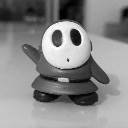

In [12]:
image = cv2.imread('shy_guy.png')
resized = cv2.resize(image,(128,128))
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

Para realizar a normalização por variância, podemos executar os seguintes passos:


In [13]:
# calcular a média de intensidade dos pixels
mu = np.ndarray.flatten(gray).mean()
# calcular o desvio padrão da intensidade dos pixels
std = np.ndarray.flatten(gray).std()
# normalizar os dados
norm = (gray - mu)/std

Como os valores agora não estão mais na escala entre 0 e 255, não faz sentido plotar a imagem desse jeito, como pode ser visto a seguir:

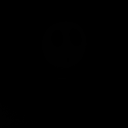

In [14]:
cv2_imshow(norm)

### Calcular os gradientes

Para obter os histogramas, utilizamos o conceito de *kernel* já visto. O objetivo é encontrar a mudança de direção do pixel central do kernel considerando os eixos $x$ e $y$ (duas direções básicas perpendicualares).

#### Compreensão do método

Mas, para entender um pouco sobre como calculamos o gradiente manualmente dos pixels, considere que temos uma janela $3\times3$ e que precisamos examinar os quatro pixels em torno do pixel central (acima, abaixo, a esquerda e a direita). Então, se considerarmos uma imagem $I$, temos as notações abaixo para denotar os pixels de interesse:

- acima: $I(x,y-1)$
- abaixo: $I(x,y+1)$
- esquerda: $I(x-1,y)$
- direita: $I(x+1,y)$

Uma representação dessas direções pode ser vista na figura abaixo:

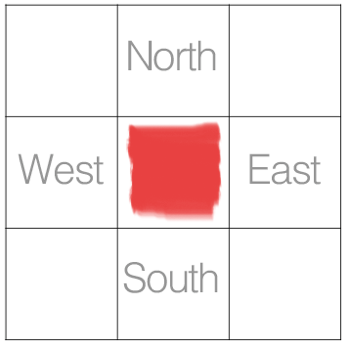

Fonte: https://customers.pyimagesearch.com/topic/gradients/

Se quisermos calcular a mudança vertical ($G_y$) de um pixel, por exemplo, fazemos:

$G_y = I(x,y+1) - I(x,y-1)$

Da mesma forma, podemos calcular a mudança na horizontal:

$G_x = I(x+1,y) - I(x-1,y)$

A partir desses valores, precisamos calcular a magnitude e direção dos gradientes. A magnitude do gradiente informa quão forte a mudança na intenside dos pixels ocorre e é representada por um valor real. Já a orientação do gradiente é usada para determinar em que direção a mudança está apontando e é medida como um ângulo. Exemplos de como a orientação de um gradiente funciona pode ser visto na figura abaixo:

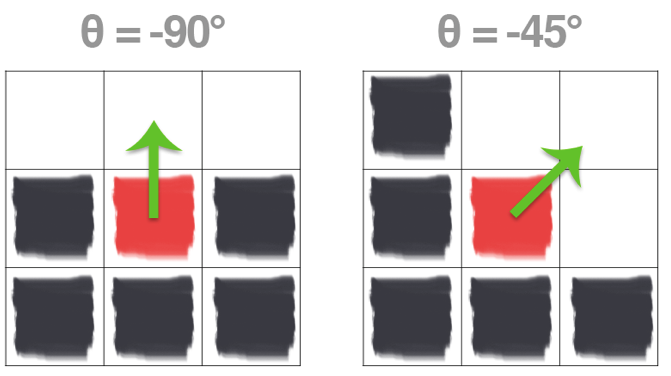

Fonte: https://customers.pyimagesearch.com/topic/gradients/

Em termos práticos, para calcular os valores de magnitude e direção do gradiente para cada pixel, utilizamos os valores de $G_x$ e $G_y$ computados anteriormente, considerando o seguinte raciocínio:

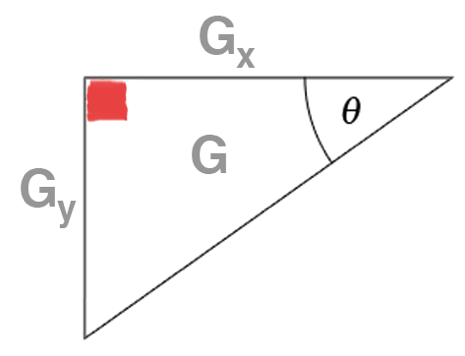

Fonte: https://customers.pyimagesearch.com/topic/gradients/

Utilizando os valores de $G_x$ e $G_y$ para construir um triângulo, fazemos uso de trigonometria para computar a magnitude (hipotenusa) e direção ($\theta$).

Assim, a magnitude do gradiente para um pixel, pode ser obtida por:

$G = \sqrt{G_x^2 + G_y^2}$.

A orientação do gradiente é dada pelo ângulo entre $G_x$ e $G_y$ e pode ser calculada por meio de:

$\theta = arctan(G_x,G_y) \times \left( \frac{180}{\pi} \right)$.

A função $arctan$ gera o resultado em radianos, mas convertemos para graus multiplicando o resultado por $\frac{180}{\pi}$.

#### Utilizando kernels

Uma vez compreeendido o conceito de como cada valor de magnitude e direção é calculada para cada pixel, passamos para a ideia de utilizar *kernels* para aproximar esses valores de uma maneira muito mais rápida. 

O método de *Sobel* utiliza dois *kernels*: um para detectar mudanças da direção horizontal e outro para detectar mudanças na vertical:

$G_x = \begin{bmatrix}
-1 & 0 & +1 \\
-2 & 0 & +2 \\
-1 & 0 & +1 \\
\end{bmatrix}
$

e

$G_y = \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
+1 & +2 & +1 \\
\end{bmatrix}
$

De posse dos valores de $G_x$ e $G_y$, calculamos o valor de $G$ e $\theta$ conforme apontado antes.

Existem outros métodos para calcular o gradiente utilizando *kernels*. Como exemplo disso, podemos citar o *Scharr*, cujos valores podem ser vistos a seguir:

$G_x = \begin{bmatrix}
+3 & 0 & -3 \\
+10 & 0 & -10 \\
+3 & 0 & -3 \\
\end{bmatrix}
$

e

$G_y = \begin{bmatrix}
+3 & +10 & +3 \\
0 & 0 & 0 \\
-3 & -10 & -3 \\
\end{bmatrix}
$

Vamos codificar para fins de exemplo o cálculo desses valores para uma imagem exemplo e mostrar os valores de $G_x$ e $G_y$ separadamente para entender o que significam os gradientes na imagem. 

Gx:


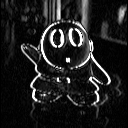

Gy:


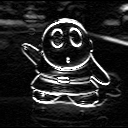

In [15]:
# vamos utilizar a imagem carregada anteriormente

# calcular os valores de gx e gy utilizando o kernel sobel nas direções dx e dy
gX = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=1, dy=0)
gY = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=0, dy=1)

# os valores de gx e gy estão em formato de ponto flutuante e já podem ser utilizados
# para quaisquer fins. No entanto, se quisermos exibi-los, devemos converter 
# para um inteiro de 8 bits (formato do OpenCV)
gXimage = cv2.convertScaleAbs(gX)
gYimage = cv2.convertScaleAbs(gY)

print(f'Gx:')
cv2_imshow(gXimage)
print(f'Gy:')
cv2_imshow(gYimage)

É fácil perceber que em $G_x$, as regiões com bordas verticais da imagem ficam mais destacadas enquanto que em $G_y$, as regiões com bordas horizontais ficam mais evidenciadas.

Para fins de comparação, veja a combinação de $G_x$ e $G_y$:

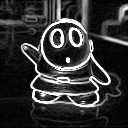

In [16]:
# matriz de magnitudes
G = np.sqrt(gX**2+gY**2)
Gimage = cv2.convertScaleAbs(G)
cv2_imshow(Gimage)

Para calcular as direções dos gradientes, basta usar os conceitos expostos anteriormente. O `NumPy` já tem uma função para isso: `arctan2`. Os valores retornados por ela estão entre [-pi,pi]. Multiplicamos o resultado por $\frac{180}{\pi}$ para deixar os valores entre -180 e +180 graus.

In [17]:
theta = np.arctan2(gX,gY) * (180/np.pi)

### Criando os histogramas para cada celula

De posse das representações de orientação e magnitude dos gradientes, devemos dividir a imagem em células e blocos.

Uma célula é uma região retangular da imagem definda pelo número de pixels que pertencem a essa célula. Por exemplo, se tivermos uma imagem 128x128 e definirmos que cada célula tem 4x4 pixels, ao todo teremos 1024 células (128/4 = 32).

Abaixo, vemos a representação de um grid de células utilizando exatamente esses valores:


In [18]:
# função para desenhar o grid
def desenhar_grid(img, grid_step=50):
    x = grid_step
    y = grid_step
    while x < img.shape[1]:  
      cv2.line(img, (x, 0), (x, img.shape[0]), (0, 255, 0))
      x += grid_step

    while y < img.shape[0]:
      cv2.line(img, (0, y), (img.shape[1], y), (0, 255, 0))
      y += grid_step

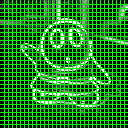

In [19]:
# converter para cores só para mostrar grid
color = cv2.cvtColor(Gimage, cv2.COLOR_GRAY2BGR)
desenhar_grid(color,grid_step=4)
cv2_imshow(color)

Note que se aumentarmos a quantidade pixels por célula, a quantidade de células diminui:

32x32 pixels por célula. 16 células ao todo.


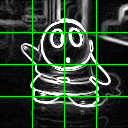

In [20]:
color = cv2.cvtColor(Gimage, cv2.COLOR_GRAY2BGR)
desenhar_grid(color,grid_step=32)
print(f'32x32 pixels por célula. 16 células ao todo.')
cv2_imshow(color)

Uma vez definido o número de células, um histograma de gradientes deve ser computado para cada célula. O cálculo dos histograma leva em consideração duas coisas:
1. o número de orientações: define a quantidade de intervalos que o histograma vai ter. Em geral, as direções estão no intervalo [0,180] ou [-180,180] e precisamos montar um histograma considerando um valor menor que 180 para computar as frequências;
2. o peso que cada pixel tem na definição do histograma de uma célula. Para cada pixel, ao invés de simplesmente adicionar uma unidade ao *bin* referente a direção do gradiente do pixel, a magnitude do seu gradiente é adicionada naquele *bin*. Dessa forma, cada pixel contribui de uma maneira ponderada de acordo com a magnitude do seu gradiente.

Abaixo, um exemplo de histograma para a primeira célula considerando que a imagem foi dividida em células com 32x32 pixels e dividimos as direções em 10 *bins*.

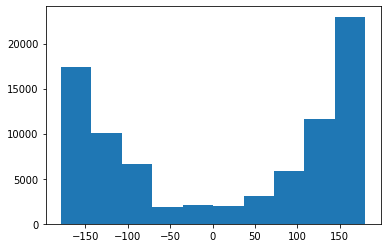

In [21]:
import matplotlib.pyplot as plt

cell = theta[0:32,0:32]

hist = plt.hist(np.ndarray.flatten(theta[0:32,0:32]), bins=10, weights=np.absolute(np.ndarray.flatten(theta[0:32,0:32])))
plt.show()

Após esse passo, o vetor de característica da imagem já poderia ser representao pela concatenação dos histogramas. Passos de normalização, podem ser adicionados posteriormente, como uma normalização L1 ou L2 sobre o vetor de histogramas concatenados.

Note que o tamanho das células influencia diretamente na quantidade de *features* que vão representar a imagem. Quanto menos pixels por célula, maior a quantidade de células e, por consequência, maior a quantidade final de features. Por exemplo, se usarmos 10 direções e 4 pixels por célula em uma imagem 128 x 128, teremos ao final 10 * 32 * 32 = 10.240 *features* para representar essa imagem. Por outro lado, se usarmos os mesmos parâmetros mas com 32 pixels por célula ao invés de 4, teremos ao final 10 * 4 * 4 = 160 *features*.

### Normalização por contraste em blocos (opcional)

Com o objetivo de minimizar as mudanças de iluminação e contraste entre as imagens, é aconselhado normalizar os valores de gradientes *localmente*. Isso requer que células vizinhas sejam conectadas para formar *blocos*. 

É comum que exista uma sobreposição entre os blocos. Assim, cada célula contribue para o vetor final de características mais de uam vez.

Para definir o tamanho dos blocos, utilizamos uma metodologia parecida com aquela que usamos para definir o tamanho das células. No entanto, dessa vez, a unidade base não é o pixel, mas a célula. Em geral, um bloco não contém muitas células, ficando normalmente com tamanho entre $2\times2$ e $3\times3$.

Abaixo, coloco uma animação de como seriam organizados os blocos $2\times2$ para uma imagem com $3\times3$ células.

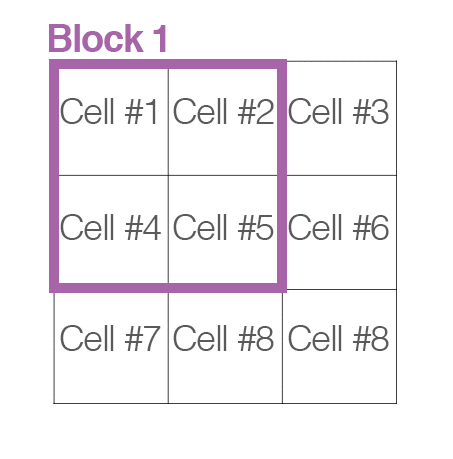

Fonte:https://customers.pyimagesearch.com/lessons/histogram-of-oriented-gradients/

### Construir o vetor de características a partir de todos os histogramas

Para construir o vetor de características final, conforme indicado, basta concatenar todos os histrogramas das células (ou blocos) e temos nosso vetor de características.

Para construir esse vetor final, vamos utilizar uma função que implementa todo processo de extração de *features* usando os histogramas de gradientes orientados: dentro do pacote `skimage`, temos um módulo chamado `feature` que possui uma função chamada de `hog`. Sua utilização se dá da seguinte maneira:

In [22]:
from skimage import feature
H = feature.hog(gray, orientations=10, pixels_per_cell=(4, 4),cells_per_block=(1, 1))

Essa implementação traz por padrão a divisão em blocos. Mas, se utilizarmos blocos 1 x 1, ou seja, um bloco equivalente a uma célula, obtemos o tamanho já calculado anteriormente.

In [23]:
H.shape

(10240,)

Nós podemos visualizar os valores resultantes dos histogramas como uma imagem inserindo o parâmetro `visualize=True`:

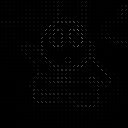

In [24]:
(H, hog_image) = feature.hog(gray, orientations=10, pixels_per_cell=(4, 4),cells_per_block=(1, 1), visualize=True)
cv2_imshow(hog_image)


Para facilitar a visualização, vamos aplicar um reescalonamento dos valores das *features* e ampliar a imagem.

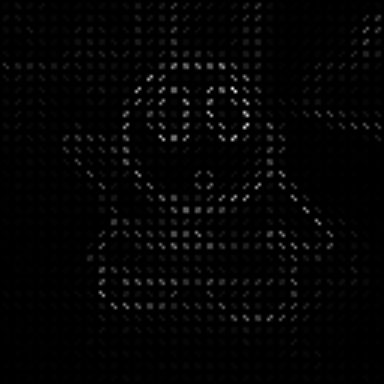

In [25]:
from skimage import exposure
(H, hog_image) = feature.hog(gray, orientations=10, pixels_per_cell=(4, 4),cells_per_block=(1, 1), visualize=True)
hog_image = exposure.rescale_intensity(hog_image, out_range=(0, 255))
hog_image = hog_image.astype("uint8")
hog_image = cv2.resize(hog_image, (384,384))
cv2_imshow(hog_image)

### Fashion MNIST

Para demonstrar o funcionamento do processo de extração de features utilizando os histogramas de gradiente orientados, vamos construir um classificador para diferenciar itens de lojas de departamento.

A base consiste de um conjunto de 70.000 imagens de treino. Cada imagem possui tamanho 28x28 em escala de cinza e estão divididas em 10 categorias. Dentre as 70.000 imagens, 60.000 são utilizadas para treinamento e 10.000 para teste.

As classes das imagens são (valor da rótulo e descrição):

- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

Mais informações sobre o projeto podem ser encontradas [aqui](https://github.com/zalandoresearch/fashion-mnist).



Os dados podem ser obtidos diretamente por meio dos links fornecidos no repositório do autor. São quarto arquivos, sendo dois (dados e rótulos) para o conjunto de treino e dois para os conjunto de testes.

In [26]:
!wget 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz'
!wget 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz'
!wget 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz'
!wget 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz'

--2022-02-15 18:27:48--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.170.72
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.170.72|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]  25.20M  15.5MB/s    in 1.6s    

2022-02-15 18:27:50 (15.5 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2022-02-15 18:27:50--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.170.72
Connecting to fashion-mnist.s3-website.eu-central-1.amaz

Os dados vêm em um formato específico e precisam ser descompactados e recodificados para serem utilizados. O código abaixo foi retirado do próprio repositório do autor e serve justamente para isso.

In [27]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

A partir disso, carregamos os pacotes necessários e os conjuntos de treino e teste.

In [28]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from skimage import feature
from sklearn.metrics import classification_report

In [29]:
X_train, y_train = load_mnist('.', kind='train')
X_test, y_test = load_mnist('.', kind='t10k')

Como vamos caracterizar os dados como imagens de fato, precisamos converter as dimensões dos dados para que o OpenCV possa reconhecer. Os dados estão em um padrão 1x784 e vamos converter para 28x28.

In [30]:
X_train = X_train.reshape(X_train.shape[0], 28,28)
X_test = X_test.reshape(X_test.shape[0], 28,28)

Vamos visulizar algumas imagens que estão nos dados.

In [31]:
cv2_imshow(X_train[1])
cv2_imshow(X_train[10])
cv2_imshow(X_train[100])

Para calcular os HOG e utilizar como características das imagens, vamos definir a função abaixo que utiliza a função `feature.hog` do pacote `skimage`.

Os parâmetros utilizados aqui são arbitrários e vamos colocar:
- 9 orientações
- 4x4 pixels por célula
- 2x2 células por bloco
- normlização L2 ao final

In [32]:
def describe(image, mask=None):
  # computa o HOG da imagem
  (H, hog_image) = feature.hog(image, orientations=9, pixels_per_cell=(4, 4),cells_per_block=(2, 2), visualize=True, block_norm='L2')
  # returna o histograma da imagem
  return H

Agora só precisamos construir o vetor de características para cada imagem do conjunto de treino e testes. O processo pode demorar uns minutinhos.

In [33]:
features_train = np.array([describe(image) for image in X_train])
features_test = np.array([describe(image) for image in X_test])

De posse das *features* das nossas imagens, vamos utilizar um algoritmo supervisionado para construir um modelo. Vamos iniciar com um algoritmo simples, como o k-NN.

In [35]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(features_train,y_train)
# verificando a acurácia após o treinamento
print(knn.score(features_test,y_test))

0.8759


Se quisermos detalhar um pouco mais o resultado obtido, dá para ver onde o modelo vai muito bem e onde ainda comete muitos erros.

In [36]:
pred = knn.predict(features_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.96      0.98      0.97      1000
           2       0.74      0.84      0.79      1000
           3       0.90      0.88      0.89      1000
           4       0.80      0.78      0.79      1000
           5       0.99      0.91      0.95      1000
           6       0.73      0.62      0.67      1000
           7       0.91      0.96      0.93      1000
           8       0.99      0.97      0.98      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Para um cenário onde não foi feito qualquer otimização do algoritmo e do processo de extração de caractísticas, o resultado não está ruim.

Podemos aplicar um outro classificador mais robusto e verificar se temos alguma melhoria no resultado.

In [37]:
from sklearn.ensemble import RandomForestClassifier

# usando o algoritmo Random Forest para construir o modelo
rf = RandomForestClassifier(max_depth=2,random_state=42)
rf.fit(features_train,y_train)
# verificando a acurácia após o treinamento
print(knn.score(features_test,y_test))

0.8759


Não foi possível observar um incremento significativo com o uso de um algoritmo mais robusto. No entanto, a exploração dos parâmetros permitidos pelo modelo HOG pode trazer *features* que consigam diferenciar melhor os objetos.

### CIFAR-10

Em muitas situações os HOG vão ser úteis e eficinetes. Mas, dependendo da aplicação, pode ser que não sejam suficientes para obter um resutlado desejado.

A base CIFAR-10 já foi explorada antes por nós e trata de um conjunto de imagens de objetos de 10 classes. Apesar de parecer com a base anterior, as imagens da CIFAR-10 apresentam uma complexidade maior já que estão em escala de cores e cujos objetos de interesse não estão sempre bem separados do fundo.

Vamos aplicar o mesmo pipiline de antes para ver o resultado.

In [38]:
# antes, vamos baixar novamente os pacotes
import numpy as np
import random
import cv2
from google.colab.patches import cv2_imshow
from skimage import feature

In [39]:
# se os dados já foram baixados, pule esta etapa ou apague os arquivos do drive.
!wget 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'

--2022-02-15 18:47:28--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  79.6MB/s    in 2.0s    

2022-02-15 18:47:30 (79.6 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [40]:
# descompactando a base de dados
# se os dados já foram descompactados, pule essa etapa ou apague os arquivos.
!tar -xf '/content/cifar-10-python.tar.gz'

Como a base vem no codificada no formato `pickle`, precisamos fazer uma conversão para utilizar as imagens. A função abaixo foi escrita para facilitar essa tarefa.

In [41]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

O conteúdo da base vem dividio em seis batches de dados, sendo cinco usados para treinamento e um para testes.

Vamos organizar esses dados.

In [42]:
# define um local base para os batches
data_dir = '/content/cifar-10-batches-py/'

# passa por cada batch convertendo os dados de treinamento e seus rótulos
batch1 = unpickle(data_dir+'data_batch_1')
b1 = batch1[b'data']
l1 = batch1[b'labels']
batch2 = unpickle(data_dir+'data_batch_2')
b2 = batch2[b'data']
l2 = batch2[b'labels']
batch3 = unpickle(data_dir+'data_batch_3')
b3 = batch3[b'data']
l3 = batch3[b'labels']
batch4 = unpickle(data_dir+'data_batch_4')
b4 = batch4[b'data']
l4 = batch4[b'labels']
batch5 = unpickle(data_dir+'data_batch_5')
b5 = batch5[b'data']
l5 = batch5[b'labels']

# faz o mesmo processo para o batch de teste
batch_test = unpickle(data_dir+'test_batch')
bt = batch_test[b'data']
lt = batch_test[b'labels']


Para fins de organização, vamos armazenar os dados em quatro arrays: 1) dados de treino; 2) rótulos de treino 3) dados de teste 4) rótulos de teste.

In [43]:
data = np.vstack((b1,b2,b3,b4,b5))
labels=np.hstack((l1,l2,l3,l4,l5))
test_data = np.array(bt)
test_labels = np.array(lt)
# imprime o formato dos dados para conferência
print(data.shape)
print(labels.shape)
print(test_data.shape)
print(test_labels.shape)

(50000, 3072)
(50000,)
(10000, 3072)
(10000,)


Como já foi feito antes, a organização dos dados e a ordem dos canais de cores são incompatíveis com o OpenCV. Precisamos, então, realizar uma conversão.

In [44]:
# função que mapeia os valores da forma como estão dispostos na base para o padrão
# utilizado pelo OpenCV.
def reshape(images_array):
  reshaped = images_array.reshape(images_array.shape[0],3,32,32)
  reshaped = reshaped.transpose(0,2,3,1)
  R = reshaped[:,:,:,0]
  G = reshaped[:,:,:,1]
  B = reshaped[:,:,:,2]
  images = np.zeros((images_array.shape[0],32,32,3), dtype=np.uint8)
  images[:,:,:,0] = B
  images[:,:,:,1] = G
  images[:,:,:,2] = R
  return images

In [45]:
data = reshape(data)
test_data = reshape(test_data)

Aqui defimos novamente uma função para calcular as *features* das imagens, que serão utilizadas no treinamento do modelo. Esse processo pode levar 10 minutos aproximadamente.

In [64]:
def describe2(image, mask=None):
  # define o tamanho dos bins
  # converte a imagem para escala de cinza
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # computa o histograma
  (H, hog_image) = feature.hog(gray, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(3, 3), visualize=True, block_norm='L2')
  # return the histogram
  return H

In [67]:
data_features = np.array([describe2(image) for image in data])
test_features = np.array([describe2(image) for image in test_data])

Vamos utilizar para construção do modelo um algoritmo robusto: o SVM.

In [48]:
from sklearn.svm import SVC

In [68]:
svm = SVC()
svm.fit(data_features,labels)
# verificando a acurácia do modelo no conjunto de testes
print(svm.score(test_features, test_labels))

0.6184


O resutlado alcançacado, apesar de coerente com o que existe na literatura, não é satisfatório. 

Mesmo com algoritmos que usam estratégias de comitês, como o Random Forest, o resultado alcançado não é satisfatório:

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf = RandomForestClassifier()
rf.fit(data_features,labels)
print(rf.score(test_features,test_labels))

0.5068


É possível que alterando otimizando o descritor HOG e os algoritmos, esses resultado atinjam um patamar mais elevado. Mas, seria necessário um esforço muito grande para atingir o resultado.

# Considerações finais

O modelo de extração de características como passo anterior a construção de um modelo com algoritmos de aprendizado de máquina foi utilizado por muito tempo como padrão para aplicação de Visão Computacional.

Até hoje é utilizado em aplicações onde a complexidade das imagens não é alta e os objetos de interesse estão bem destacados. Por outro lado, com o advento das redes convolucionais, esse processo vem se tornando menos utilizado, já que a robustez dos algoritmos de aprendizado profundo vem trazendo resultados cada vez melhores para as aplicações de visão computacional.

Existem muitos outros descritores de imagem e cada um é mais adequado para situações específicas. Sendo assim, outros descritores utilizados nas mesmas aplicações mostradas anteriormente devem trazer resultados bastante diferentes (melhores ou piores).

Assim, a extração de características é importante no processo de reconhecimento de padrões em imagens e pode ser feito de diferentes maneiras. Ao mesmo tempo, existem limitações que só podem ser superadas com abordagens diferentes de aprendizado de máquina, como as redes convolucionais. 